In [1]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
# Sample JSON configuration (replace this with your JSON data)
network_config = """
{
  "nodes": {
    "1A": { "type": "manufacturer", "I": 30 },
    "1B": { "type": "manufacturer", "I": 28 },
    "1C": { "type": "manufacturer", "I": 32 },
    "2A": { "type": "manufacturer", "I": 20 },
    "2B": { "type": "manufacturer", "I": 22 },
    "2C": { "type": "manufacturer", "I": 18 },
    "3A": { "type": "manufacturer", "I": 20 },
    "3B": { "type": "manufacturer", "I": 22 },
    "3C": { "type": "manufacturer", "I": 18 },
    "D": { "type": "distributor" },
    "S": { "type": "source" }
  },
  "edges": [
    { "source": "S", "target": "3A", "L": 3, "D": 0 },
    { "source": "S", "target": "3B", "L": 3, "D": 0 },
    { "source": "S", "target": "3C", "L": 3, "D": 0 },
    { "source": "3A", "target": "2A", "L": 4, "D": 0 },
    { "source": "3B", "target": "2B", "L": 4, "D": 0 },
    { "source": "3C", "target": "2C", "L": 4, "D": 0 },
    { "source": "2A", "target": "1A", "L": 4, "D": 0 },
    { "source": "2B", "target": "1B", "L": 4, "D": 0 },
    { "source": "2C", "target": "1C", "L": 4, "D": 0 },
    { "source": "1A", "target": "D", "L": 5, "D": 0 },
    { "source": "1B", "target": "D", "L": 5, "D": 0 },
    { "source": "1C", "target": "D", "L": 5, "D": 0 }
  ]
}
"""

In [3]:
# Load the JSON configuration
config = json.loads(network_config)

# Create a directed graph
graph = nx.DiGraph()

# Add nodes to the graph
for node, attributes in config['nodes'].items():
    graph.add_node(node, **attributes)

# Add edges to the graph with lead times
for edge in config['edges']:
    graph.add_edge(edge['source'], edge['target'], L=edge['L'])

Node Attributes:
Node 1A: {'type': 'manufacturer', 'I': 30}
Node 1B: {'type': 'manufacturer', 'I': 28}
Node 1C: {'type': 'manufacturer', 'I': 32}
Node 2A: {'type': 'manufacturer', 'I': 20}
Node 2B: {'type': 'manufacturer', 'I': 22}
Node 2C: {'type': 'manufacturer', 'I': 18}
Node 3A: {'type': 'manufacturer', 'I': 20}
Node 3B: {'type': 'manufacturer', 'I': 22}
Node 3C: {'type': 'manufacturer', 'I': 18}
Node D: {'type': 'distributor'}
Node S: {'type': 'source'}


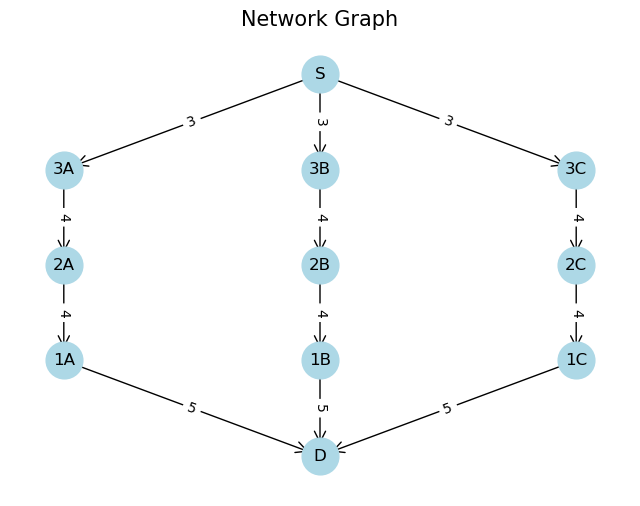

In [4]:
# Print node attributes
print("Node Attributes:")
for node, attributes in graph.nodes(data=True):
    print(f"Node {node}: {attributes}")

# Define the hierarchical layout using graphviz's 'dot'
pos = graphviz_layout(graph, prog="dot")

# Define the plot
plt.figure(figsize=(8, 6))

# Draw the nodes
nx.draw_networkx_nodes(graph, pos, node_size=700, node_color='lightblue')

# Draw the edges
nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(), arrowstyle='->', arrowsize=20)

# Draw the node labels
nx.draw_networkx_labels(graph, pos, font_size=12, font_family="sans-serif")

# Extract the edge labels (lead times) and draw them
edge_labels = nx.get_edge_attributes(graph, 'L')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Set plot title
plt.title("Network Graph", fontsize=15)

# Display the plot
plt.axis('off')  # Turn off the axis
plt.show()

In [5]:
import numpy as np

# Define the initial state
initial_inventories = [2, 4, 5]
expected_demands = [10, 10, 10]

state = np.array([initial_inventories] + [expected_demands])

state

array([[ 2,  4,  5],
       [10, 10, 10]])

In [6]:
state[0][0]

2

In [7]:
# Define the initial state
initial_inventories = [2]
expected_demands = [10]

state = np.array([initial_inventories + expected_demands])

state

array([[ 2, 10]])

In [8]:
low = np.zeros(5)

low

array([0., 0., 0., 0., 0.])